In [4]:
                                 # Salary Project

                             #  Problem Statement
   # Predict the salary if the employee using the features provided in the data. 


In [95]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [96]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [97]:
#import data
data = pd.read_csv(r'C:\Users\Icons\Desktop\kajal data science\salaries.csv')
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [98]:
# fillna 
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   yrs.since.phd  397 non-null    int64 
 2   yrs.service    397 non-null    int64 
 3   sex            397 non-null    object
 4   salary         397 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.6+ KB


In [100]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [102]:
data['yrs.service'].value_counts()

3     22
19    19
7     18
8     18
23    16
18    15
9     15
2     15
11    14
4     13
1     13
27    11
0     11
6     11
10    11
31    10
20    10
15     9
30     9
28     9
14     8
5      8
16     8
22     8
25     8
38     8
26     7
36     6
17     6
21     6
12     5
35     5
40     5
33     4
37     4
45     4
43     4
39     4
44     3
49     3
24     2
34     2
53     1
57     1
32     1
29     1
41     1
48     1
46     1
51     1
13     1
60     1
Name: yrs.service, dtype: int64

# Let us visualise the data:

<AxesSubplot:xlabel='yrs.service', ylabel='yrs.since.phd'>

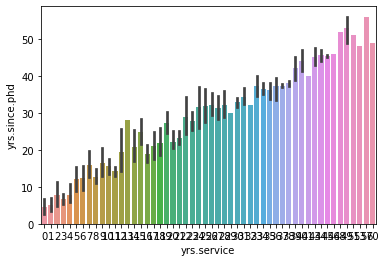

In [150]:
sns.barplot(x=data['yrs.service'],y=data['yrs.since.phd'])

In [104]:
# checking the correlation of the data
data.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:xlabel='yrs.service', ylabel='rank'>

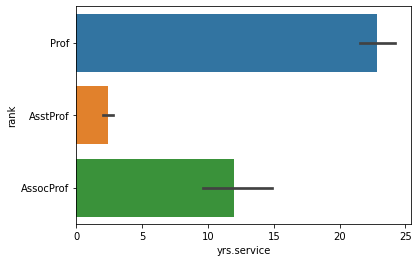

In [105]:
sns.barplot(x=data['yrs.service'],y=data['rank'])

<AxesSubplot:xlabel='yrs.service', ylabel='sex'>

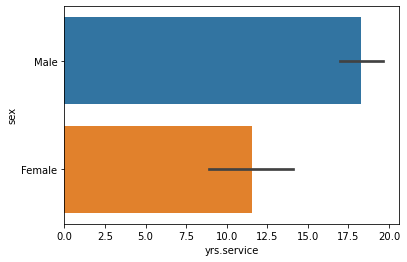

In [106]:
sns.barplot(x=data['yrs.service'],y=data['sex'])

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

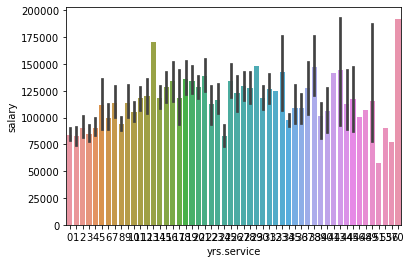

In [107]:
sns.barplot(x=data['yrs.service'],y=data['salary'])

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

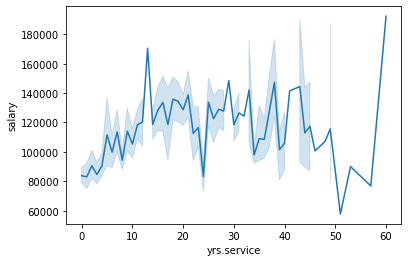

In [108]:
sns.lineplot(x=data['yrs.service'],y=data['salary'])

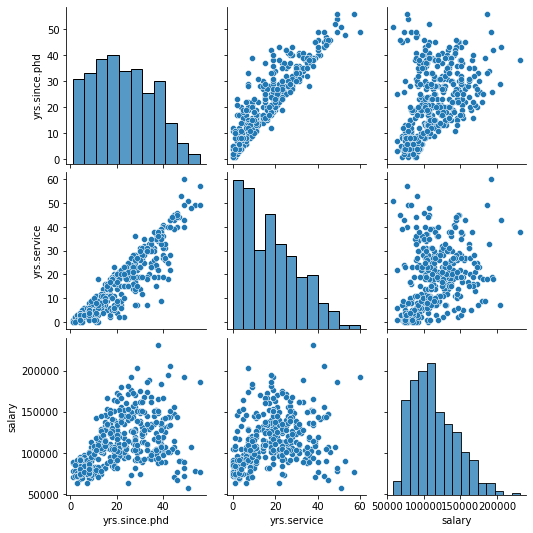

In [109]:
sns.pairplot(data)

# Data preparation

In [122]:
X=data[['yrs.service']]
y=data.salary

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [128]:
X_train.shape,X_test.shape

((317, 1), (80, 1))

In [129]:
Y_train.shape, Y_test.shape

((265,), (132,))

# model building


In [126]:
# test and train the model
from sklearn.neighbors import KNeighborsRegressor
 
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)
 
regressor.score(X_test, y_test)

0.0007826844907945496

In [140]:
pred=regressor.predict(X_test)

In [141]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [142]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squarred error: ',mean_squared_error(y_test,pred))
print(' Root mean squarred error: ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score: ',r2_score(y_test,pred))

Mean absolute error:  17744.752500000002
Mean squarred error:  571542327.7895
 Root mean squarred error:  23906.95145328028
R2 Score:  0.24122198638783798


# SVM

In [143]:
from sklearn.svm import LinearSVR

In [144]:
svr=LinearSVR(epsilon=1.5)

In [145]:
model_2=svr.fit(X_train,y_train)

In [146]:
pred_2=model_2.predict(X_test)

In [139]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred_2))
print('Mean squarred error: ',mean_squared_error(y_test,pred_2))
print(' Root mean squarred error: ',np.sqrt(mean_squared_error(y_test,pred_2)))

Mean absolute error:  59033.97845449501
Mean squarred error:  4450995279.916
 Root mean squarred error:  66715.77984192346
